In [1]:
import pickle
import pandas as pd

with open('spotify_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [2]:
data

,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness,id,name,artist
0,0.583,0.833,0.01510,0.000000,0,0.1100,11,94.033,0.4880,-7.942,0.2940,0DQ0uSMu01OFSxZ7Qcy7Zb,Bankrolls & Groupie Hoes (feat. Stunna 4 Vegas),Lil Poppa
1,0.477,0.673,0.53800,0.339000,1,0.1350,10,179.934,0.5090,-8.258,0.0705,72D79mMBu1fs0DbnUU7Ecq,Can You Help Me,$NOT
2,0.684,0.888,0.02290,0.000000,1,0.4580,7,84.982,0.5320,-6.360,0.2650,6aIARN0We3Rf0O2n20J8hp,RNB (feat. Megan Thee Stallion),Young Dolph
3,0.461,0.851,0.47400,0.000000,1,0.2580,8,143.974,0.6200,-7.876,0.3220,3S5dLLX6GvTJa1bwAlN4wD,"No Suburban, Pt. 2",Sheff G
4,0.696,0.954,0.00576,0.000498,0,0.0754,10,100.036,0.4320,-7.117,0.2040,4Hpib09wXgD84w4uwTPnYD,Tap In,Saweetie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,0.237,0.773,0.40100,0.783000,1,0.0808,0,142.957,0.1490,-14.617,0.2580,1QeEuSgJieIbIcYpeND3IU,Low Fly,TheeAgris
5456,0.373,0.638,0.29000,0.774000,1,0.2380,4,79.007,0.0396,-11.411,0.1500,3MYLwBjjdVbcj0M7kUGodd,us,Miscél
5457,0.155,0.726,0.55800,0.709000,0,0.0910,11,82.994,0.3490,-20.248,0.0665,2PQ0EBpFcm9kaT11Zz4FAB,Flagstaff And Forest Fires,Charles Edison
5458,0.294,0.406,0.61200,0.918000,1,0.4290,0,65.553,0.3860,-14.574,0.0693,0Ueq7HrYgIzQ8wcIW6Duzg,Levitating,Various Artists


In [3]:
data_reordered = data[['id',
 'name',
 'artist',
 'energy',
 'danceability',
 'acousticness',
 'instrumentalness',
 'mode',
 'liveness',
 'key',
 'tempo',
 'valence',
 'loudness',
 'speechiness']]

In [4]:
#track we'
with open('new_searched_track8.pkl', 'rb') as f:
    searched = pickle.load(f)

# cols = searched.columns.tolist()
# cols = cols[-3:] + cols[:11]
# cols
# searched1 = searched[cols]
# searched1
searched_track = searched[['id',
 'name',
 'artist',
 'energy',
 'danceability',
 'acousticness',
 'instrumentalness',
 'mode',
 'liveness',
 'key',
 'tempo',
 'valence',
 'loudness',
 'speechiness']]
searched_track

,id,name,artist,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness
0,2hzeDi6y5AeYhWWxmEzYyV,Truth Be Told,Toosii,0.45,0.816,0.0867,0,0,0.126,1,83.507,0.425,-11.571,0.448


In [5]:
#pca example 2
correlation = data_reordered.corr()
correlation.style.background_gradient(cmap='coolwarm')


,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness
energy,1.000000,-0.057021,-0.642074,-0.436196,0.052224,0.188735,0.007083,0.184051,0.346273,0.758656,-0.052999
danceability,-0.057021,1.000000,-0.113901,0.014183,-0.119793,-0.079952,0.004146,-0.123123,0.284197,0.033522,0.156904
acousticness,-0.642074,-0.113901,1.000000,0.380326,-0.033535,-0.099803,-0.001744,-0.159594,-0.229909,-0.539503,0.038872
instrumentalness,-0.436196,0.014183,0.380326,1.000000,-0.097496,-0.073060,0.014407,-0.131643,-0.172440,-0.518202,-0.010373
mode,0.052224,-0.119793,-0.033535,-0.097496,1.000000,-0.025625,-0.124404,0.063934,-0.015198,0.064759,-0.126206
liveness,0.188735,-0.079952,-0.099803,-0.073060,-0.025625,1.000000,0.006338,0.030197,0.050550,0.123999,0.050936
key,0.007083,0.004146,-0.001744,0.014407,-0.124404,0.006338,1.000000,-0.013671,0.024338,-0.000719,0.002948
tempo,0.184051,-0.123123,-0.159594,-0.131643,0.063934,0.030197,-0.013671,1.000000,0.049045,0.157810,0.037927
valence,0.346273,0.284197,-0.229909,-0.172440,-0.015198,0.050550,0.024338,0.049045,1.000000,0.211644,0.015864
loudness,0.758656,0.033522,-0.539503,-0.518202,0.064759,0.123999,-0.000719,0.157810,0.211644,1.000000,-0.051156


In [7]:
features = data_reordered.loc[:, 'energy':'speechiness']
cols_to_standardize = features.columns.tolist()

In [8]:
from sklearn.preprocessing import StandardScaler
std_audio = StandardScaler().fit_transform(data_reordered[cols_to_standardize]) # normalizing the data

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
principalComponents = pca.fit_transform(std_audio)

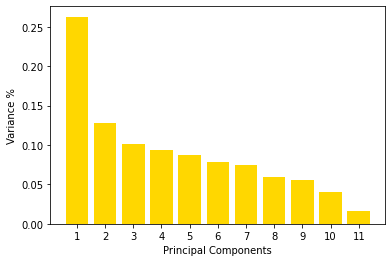

In [12]:
# Plotting the variances for each PC
import matplotlib.pyplot as plt

PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

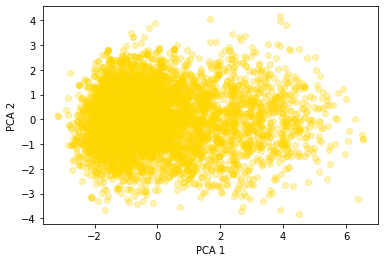

In [13]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

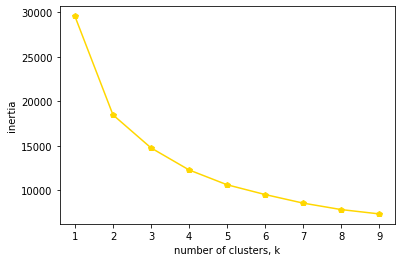

In [15]:
from sklearn.cluster import KMeans

inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks(k)
plt.show()

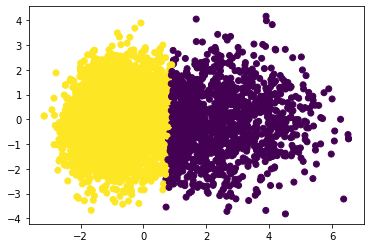

In [16]:
model = KMeans(n_clusters=2)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [18]:
#getting the labels in the new PCA Kmeans df
segm_kmeans = pd.concat([data_reordered.reset_index(drop=True)],axis=1)
#segm_kmeans.columns.values[-11:] = ["Component 1","Component 2","Component 3","Component 4","Component 5","Component 6","Component 7","Component 8","Component 9","Component 10","Component 11"]
segm_kmeans["Segment KMeans PCA"] = model.labels_
# segm_kmeans["Segment"] = segm_kmeans["Segment KMeans PCA"].map({0:"Cluster 1",1:"Cluster 2",2:"Cluster 3",3:"Cluster 4",4:"Cluster 5"})
segm_kmeans["Segment"] = segm_kmeans["Segment KMeans PCA"].map({0:"Cluster 1",1:"Cluster 2"})

segm_kmeans[:50]


,id,name,artist,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness,Segment KMeans PCA,Segment
0,0DQ0uSMu01OFSxZ7Qcy7Zb,Bankrolls & Groupie Hoes (feat. Stunna 4 Vegas),Lil Poppa,0.583,0.833,0.015100,0.000000,0,0.1100,11,94.033,0.488,-7.942,0.2940,1,Cluster 2
1,72D79mMBu1fs0DbnUU7Ecq,Can You Help Me,$NOT,0.477,0.673,0.538000,0.339000,1,0.1350,10,179.934,0.509,-8.258,0.0705,1,Cluster 2
2,6aIARN0We3Rf0O2n20J8hp,RNB (feat. Megan Thee Stallion),Young Dolph,0.684,0.888,0.022900,0.000000,1,0.4580,7,84.982,0.532,-6.360,0.2650,1,Cluster 2
3,3S5dLLX6GvTJa1bwAlN4wD,"No Suburban, Pt. 2",Sheff G,0.461,0.851,0.474000,0.000000,1,0.2580,8,143.974,0.620,-7.876,0.3220,1,Cluster 2
4,4Hpib09wXgD84w4uwTPnYD,Tap In,Saweetie,0.696,0.954,0.005760,0.000498,0,0.0754,10,100.036,0.432,-7.117,0.2040,1,Cluster 2
5,0qnHywpYq7D2SGMpuHEasL,Not A Rapper (feat. Lil Baby & Yo Gotti),42 Dugg,0.715,0.888,0.128000,0.000000,0,0.0898,8,120.106,0.557,-3.377,0.2740,1,Cluster 2
6,4Zjdzxx0dsavsr7Ehr8fGE,Prospect (ft. Lil Baby),iann dior,0.579,0.816,0.203000,0.000000,1,0.1270,1,120.078,0.430,-6.097,0.0867,1,Cluster 2
7,2hzeDi6y5AeYhWWxmEzYyV,Truth Be Told,Toosii,0.450,0.816,0.086700,0.000000,0,0.1260,1,83.507,0.425,-11.571,0.4480,0,Cluster 1
8,0fo53bqWHuxcAsi28m51tx,Fox 5 (feat. Gunna),Lil Keed,0.535,0.975,0.048800,0.000032,1,0.1180,5,119.989,0.843,-7.340,0.2650,1,Cluster 2
9,53bR9JfYaPowu2rhVriD6K,I'm Him (feat. Denzel Curry),Smokepurpp,0.834,0.819,0.136000,0.000000,1,0.1360,6,133.980,0.743,-5.804,0.0916,1,Cluster 2


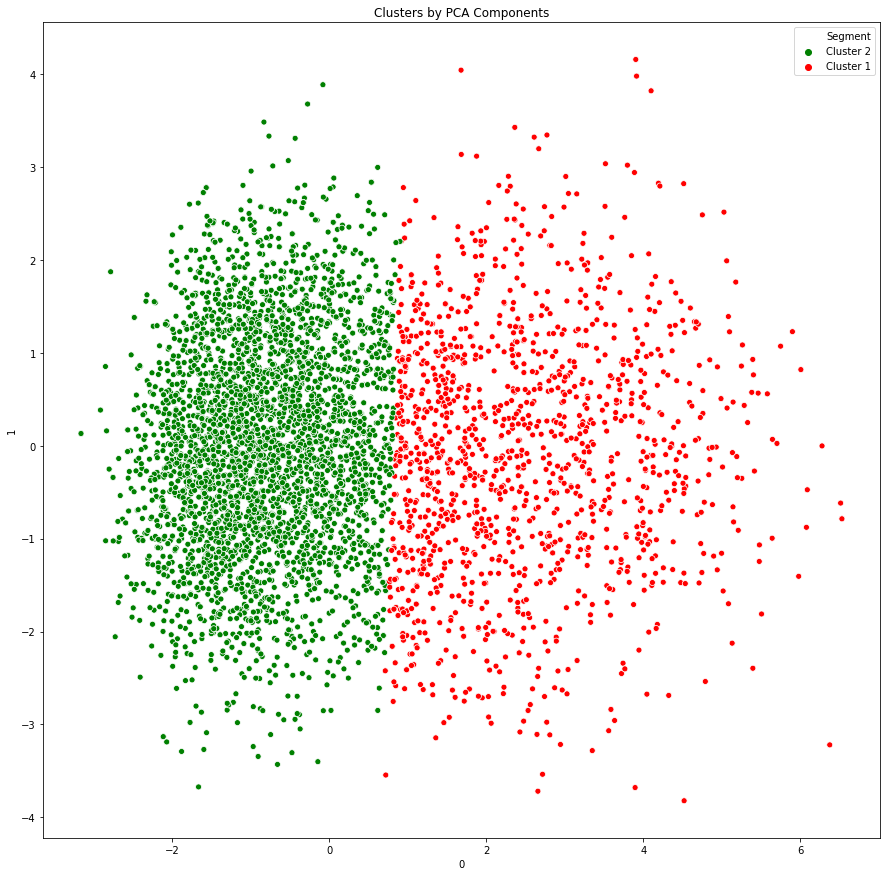

In [19]:
#visualization PCA Kmeans result
%matplotlib inline
import seaborn as sns

x_axis = PCA_components[0]
y_axis = PCA_components[1]
plt.figure(figsize=(15,15))
# sns.scatterplot(x_axis,y_axis,hue = segm_kmeans["Segment"],palette = ['g','r','b','y','m'])
sns.scatterplot(x_axis,y_axis,hue = segm_kmeans["Segment"],palette = ['g','r'])

plt.title("Clusters by PCA Components")
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
std_audio = StandardScaler().fit_transform(searched_track[cols_to_standardize]) # normalizing the data
# pca = PCA(n_components=1)
principalComponents = pca.transform(std_audio)
PCA_components = pd.DataFrame(principalComponents)
print(model.predict(PCA_components.iloc[:,:2]))

[1]
